In [1]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_ollama import ChatOllama

In [2]:
class AgentState(TypedDict):
    user_input: Annotated[HumanMessage, "Input from the user"]

    researcher_response: Annotated[AIMessage,
                                   "Response from researcher agent"]
    summarizer_response: Annotated[AIMessage,
                                   "Response from summarizer agent"]
    linkedin_response: Annotated[AIMessage,
                                 "Response from linkedin agent"]
    blog_response: Annotated[AIMessage,
                             "Response from blog agent"]
    youtube_response: Annotated[AIMessage,
                                "Response from youtube agent"]

In [3]:
llm = ChatOllama(model="gemma3:1b", temperature=0.7)

In [4]:
# main researcher agent
def researcher_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a Expert Researcher with extensive knowledge in various fields. Given the user query, provide detailed information with relevant facts.
    answer the user question accurate and concisely.
    """)

    response = llm.invoke([system_prompt, state['user_input']])

    return {"researcher_response": response}

In [5]:
# summarizer agent
def summarizer_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a Concise Summarizer with expertise in distilling complex information into clear and concise summaries in 200 words. Given detailed information from the researcher agent, provide a clear and concise summary in 200 words.
    """)

    # Pass the researcher's response content as a HumanMessage to the summarizer
    researcher_content = state['researcher_response'].content
    response = llm.invoke(
        [system_prompt, HumanMessage(content=researcher_content)])

    return {"summarizer_response": response}

In [6]:
# linkedin content creation agent
def linkedin_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a LinkedIn Content Creator specializing in crafting engaging LinkedIn posts. Given the information from the researcher agent, create a professional and engaging LinkedIn post in 100-150 words.
    """)

    researcher_content = state['researcher_response'].content
    response = llm.invoke(
        [system_prompt, HumanMessage(content=researcher_content)])

    return {"linkedin_response": response}

In [ ]:
# blog post creation agent
def blog_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a Skilled Blog Writer with expertise in creating informative and engaging blog posts with title. Given the information from the researcher agent, write a detailed blog post in 800-900 words.
    """)

    researcher_content = state['researcher_response'].content
    response = llm.invoke(
        [system_prompt, HumanMessage(content=researcher_content)])

    return {"blog_response": response}

In [8]:
# youtube script creation agent
def youtube_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a Creative YouTube Scriptwriter with expertise in crafting engaging scripts for YouTube videos. Given the information from the researcher agent, write an engaging YouTube script for 20-minute video script + 3 catchy titles.
    """)

    researcher_content = state['researcher_response'].content
    response = llm.invoke(
        [system_prompt, HumanMessage(content=researcher_content)])

    return {"youtube_response": response}

In [9]:
graph = StateGraph(AgentState)

# nodes:
graph.add_node("researcher_agent", researcher_agent)
graph.add_node("summarizer_agent", summarizer_agent)
graph.add_node("linkedin_agent", linkedin_agent)
graph.add_node("blog_agent", blog_agent)
graph.add_node("youtube_agent", youtube_agent)

# edges:
graph.add_edge(START, "researcher_agent")
graph.add_edge("researcher_agent", "summarizer_agent")
graph.add_edge("researcher_agent", "linkedin_agent")
graph.add_edge("researcher_agent", "blog_agent")
graph.add_edge("researcher_agent", "youtube_agent")

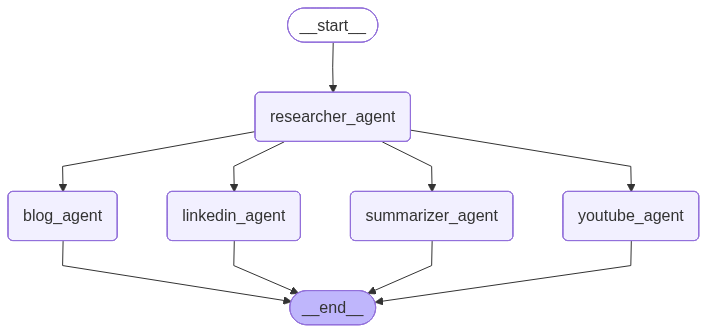

In [10]:
app = graph.compile()
app

In [11]:
user_input_here = "how does photosynthesis work?"

result = app.invoke({
    "user_input": HumanMessage(content=user_input_here),
})

In [17]:
# print(result["researcher_response"].content)

In [13]:
print(result["summarizer_response"].content)

Okay, that’s a great starting point! Let’s focus on the **role of chlorophyll in photosynthesis**. Here’s a summary tailored to that point, aiming for around 200 words:

**Chlorophyll: The Key to Sunlight Conversion**

Chlorophyll is the pigment within plant cells, primarily in chloroplasts, responsible for capturing light energy during photosynthesis. It’s not just a passive color; it’s a complex molecule that absorbs blue and red light wavelengths very efficiently, while reflecting green light, which is why plants appear green to us.

**The Two Stages – Light-Dependent & Light-Independent:**

Photosynthesis unfolds in two key stages:

1. **Light-Dependent Reactions (The "Photo" Stage):**  These reactions occur in the thylakoid membranes within chloroplasts. Chlorophyll absorbs sunlight, triggering the splitting of water molecules (H₂O), releasing electrons, and producing oxygen (O₂) as a byproduct – the oxygen we breathe! ATP and NADPH, energy-carrying molecules, are also produced.



In [14]:
print(result["blog_response"].content)

Okay, that’s a great starting point! Let’s focus on deepening our understanding of photosynthesis. Here’s a revised blog post, expanding on the key concepts and aiming for a slightly more engaging and detailed read, aiming for around 600-700 words:

**The Amazing Secret of Photosynthesis: How Plants Make Food and Breathe Oxygen**

Have you ever wondered how a simple plant can produce enough food to feed itself and, crucially, provide us with the air we breathe? The answer lies within a remarkably complex and vital process called photosynthesis – a biological marvel that’s fundamentally shaped the planet we inhabit. Essentially, photosynthesis is how plants, algae, and some bacteria transform light energy into chemical energy, creating the food they need to survive and releasing the oxygen we need to live.

**What Exactly *Is* Photosynthesis?**

At its core, photosynthesis is the conversion of light energy into chemical energy, specifically the form of sugar (glucose). Think of it as a 

In [15]:
print(result["youtube_response"].content)

Okay, fantastic! Let’s build this YouTube script. Here’s a 20-minute YouTube script focusing on the core concepts and designed to be engaging for a general audience, incorporating visual cues and pacing.

**Video Title Options:**

1.  **Photosynthesis: The Secret to Life on Earth** (Broad appeal)
2.  **Unlocking Photosynthesis: How Plants Make Food & Oxygen** (More specific)
3.  **Photosynthesis Explained: A Simple Guide to the Amazing Process** (Focuses on clarity)


Here's the script:

**(Intro - 0:00-0:30) - Energetic and Visual**

*   **(Visuals: Fast-paced montage of lush forests, vibrant plants, and a beautiful sunrise)**
*   **Voiceover (Upbeat, enthusiastic tone):** “Ever wonder how plants get their food? Or *why* we breathe oxygen? It all comes down to a truly incredible process called photosynthesis! It’s the key to life as we know it, and it's surprisingly simple, but unbelievably powerful.”
*   **(Transition graphic: Title card: "Photosynthesis - The Plant Powerhouse")**

*

In [16]:
print(result["linkedin_response"].content)

Okay, that’s a fantastic starting point! Here’s a LinkedIn post draft based on your outline, aiming for a balance of informative and engaging – approximately 120-150 words:

---

**Headline:** 🌱 Harnessing the Sun: The Magic of Photosynthesis! ☀️

**Body:**

Ever wonder how plants feed themselves? It’s all thanks to photosynthesis – an incredibly clever process where plants convert sunlight, water, and carbon dioxide into sugars (their food!) and release the oxygen we breathe. 

Here’s the simplified equation: 6CO₂ + 6H₂O + Light Energy → C₆H₁₂O₆ + 6O₂!  It’s a truly amazing transformation.

Photosynthesis happens in two stages: the light-dependent reactions (where light energy splits water) and the light-independent reactions (the Calvin cycle – where carbon dioxide is ‘fixed’ into glucose).

Chlorophyll, the green pigment, captures the sun’s energy. Plants absorb water and carbon dioxide through their roots.  It’s vital for food chains, producing the oxygen we need to survive! 

**Wa